In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("assets/spotify-2023.csv")
data['streams'] = data['streams'].astype(float)
data['in_spotify_playlists'] = data['in_spotify_playlists'].astype(float)
data.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
936,Labyrinth,Taylor Swift,1,2022,10,21,1597.0,0,1.873398e+08,6,...,110,NaN,Major,48,15,31,80,22,12,4
114,Everybody Wants To Rule The World,Tears For Fears,1,1985,2,17,41751.0,25,1.205952e+09,101,...,112,G,Major,64,54,81,36,0,11,6
900,Bound 2,Kanye West,1,2013,1,1,19806.0,7,7.033017e+08,33,...,149,C#,Major,37,28,66,14,0,9,5
887,Attention,NewJeans,1,2022,8,1,799.0,12,2.647175e+08,14,...,105,A#,Minor,81,70,65,24,0,8,4
354,Monoton�,"Ozuna, Shakira",2,2022,10,19,3645.0,15,3.807265e+08,118,...,132,NaN,Minor,87,82,70,42,0,21,5


C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='key', ylabel='Count'>

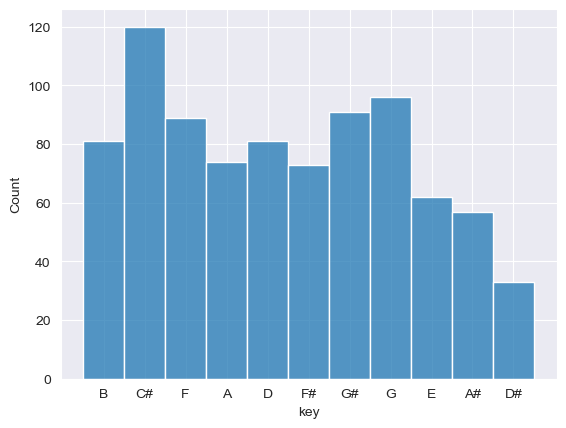

In [26]:
sns.histplot(data=data, x="key")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='released_month', ylabel='Count'>

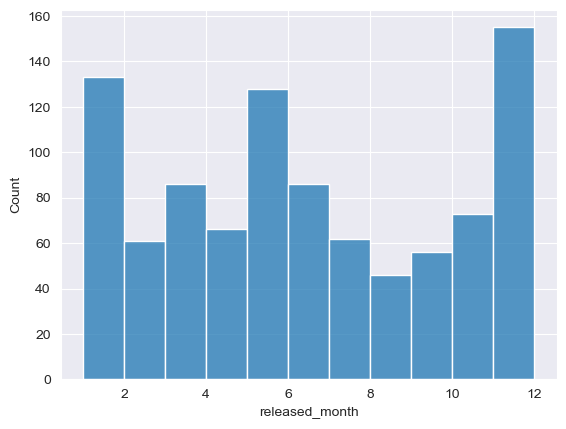

In [18]:
sns.histplot(data=data, x="released_month")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bpm', ylabel='Count'>

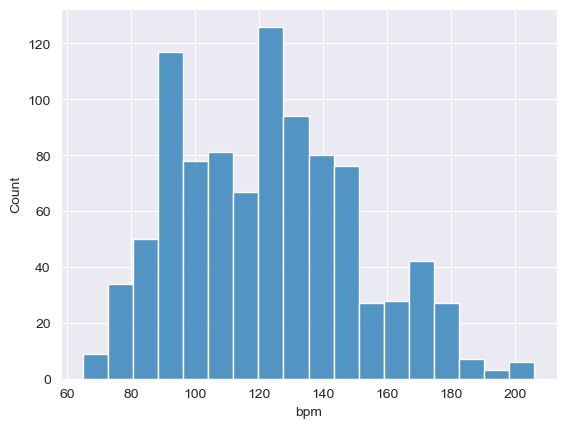

In [27]:
sns.histplot(data=data, x="bpm")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='streams', ylabel='in_apple_playlists'>

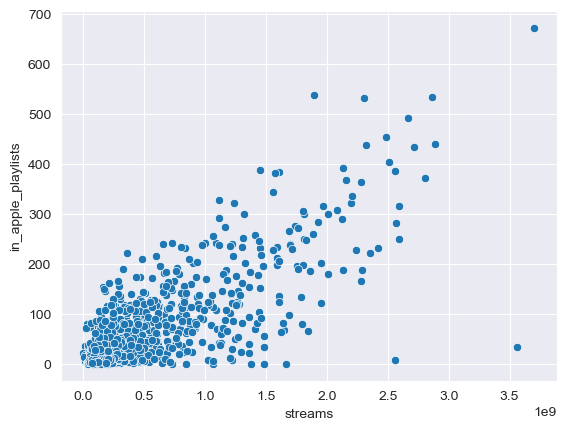

In [38]:
sns.scatterplot(data=data, x="in_spotify_playlists", y="in_apple_playlists")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='in_spotify_playlists', ylabel='streams'>

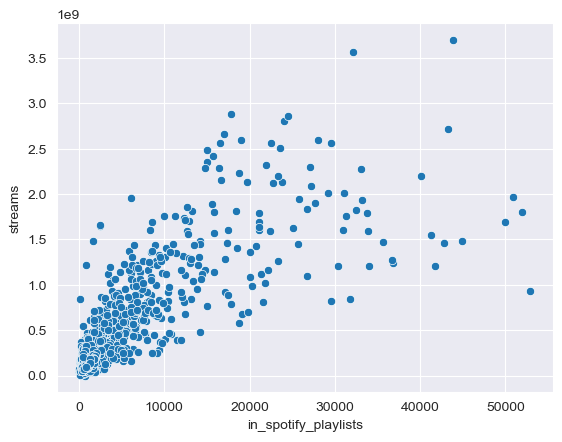

In [39]:
sns.scatterplot(data=data, x="in_spotify_playlists", y="streams")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='released_year', ylabel='Count'>

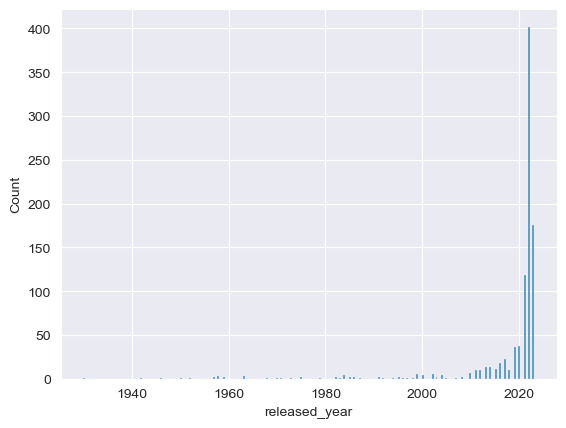

In [41]:
sns.histplot(data=data, x="released_year")

C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tobia\miniconda3\envs\aids\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

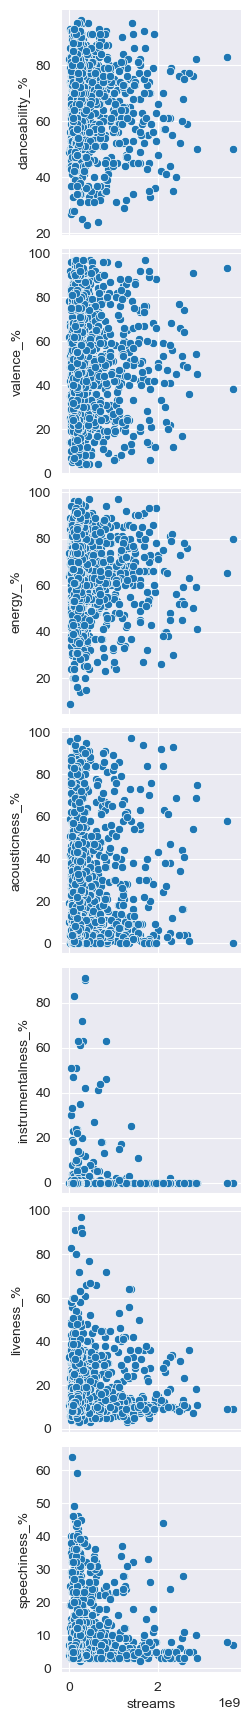

In [51]:
sns.pairplot(data=data,
             y_vars=["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%",
                     "speechiness_%"], x_vars=["streams"])

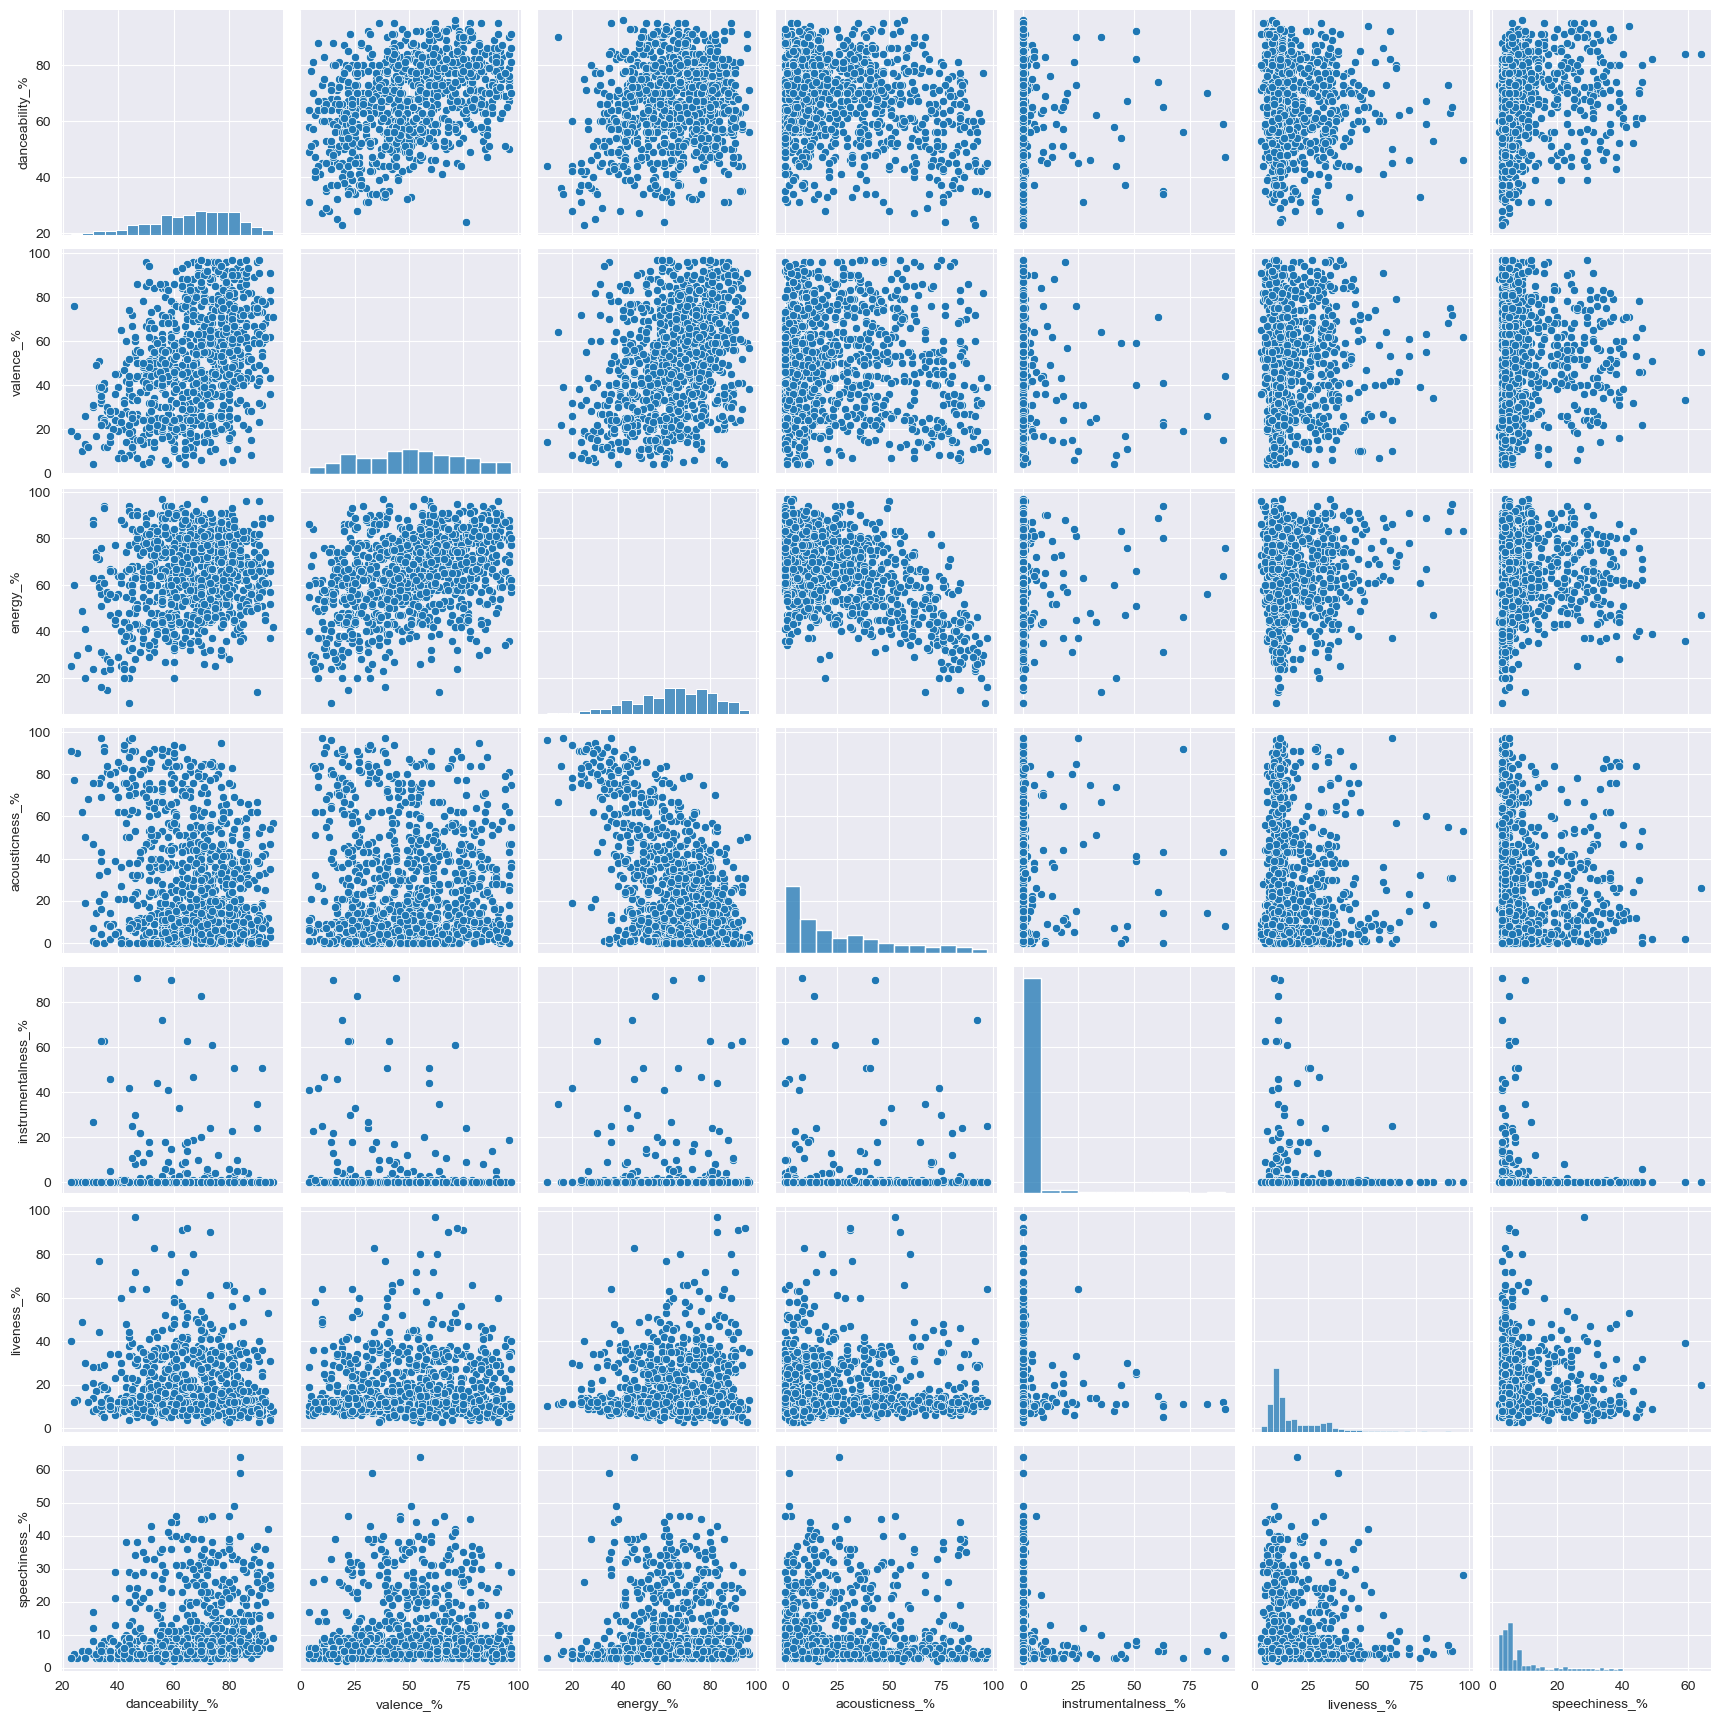

In [4]:
sns.pairplot(data=data,
             y_vars=["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%",
                     "speechiness_%"],
             x_vars=["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%",
                     "speechiness_%"])